The first function sums the pahses to make intensity in accordance with the formula $ I(t)$ = $ \beta E_0^2 \sum_{j} \sum_{k} e^{i(\phi_j(t) - \phi_k(t)} $ Actually it just does the real part so it is cosine instead of $e^i$

In [324]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

def intensitymaker(phases):
    #given an array of phases, returns electrical intensity
    summedphase = 0
    for i in range(200):
        for k in range(200):
            sumone = math.cos(phases[i] - phases[k]) #maybe should not be cosine?
            summedphase = sumone +summedphase
    constants = 1 #needs calculation. set as one
    intensity = constants * summedphase
    
    return(intensity)
    



This function moves every particle in accordance with the predicted gaussian pattern.

In [325]:
def timestep(r):
    #returns x y and z positions after a time step
    sd = 1 #fake standard deviation for now
    for i in range(len(r[0])):
        r[0][i] += np.random.normal(0,sd) #need to calculate standard deviation here
        r[1][i] += np.random.normal(0,sd)
        r[2][i] += np.random.normal(0,sd)
    return(r)

The phasemaker function, when given the displacement of the particles $r$ and the angle $\theta$ (the angle from the laser from which the displacement is measured) will. First we establish the magnitude of $K$ by $K = \frac{2 \pi}{\lambda} \sin(\theta/2)$. From that magnitude, the component vectors can be found by multiplying $K$ by $\cos(\theta)$ and by $\sin(\theta)$, and we put those component vectors into an array so we can get the vector $\boldsymbol{K}$. The dot product $\boldsymbol{K} \cdot \boldsymbol{r} = \phi$, so we use this function to create an array of the phase of light scattered from each particle. An more in depth explanation of the math behind this can be found in the paper

In [336]:

def phasemaker(r,theta):
    #given positions of particles relative to their starting ppositions returns phases
    #hold on, I do not think I need z_pos? Because phase is dot product of vector K and r, and the z component ok K is 0
    #so K is K = kx + ky, where k is lambda/2pi. K dot r is kx*x +ky*y +0*z
    constant = 1 #actually 2 pi over wavelength, but I will calculate later
    K = constant * math.sin(theta/2)
    k = np.array([K * math.cos(theta), K * math.sin(theta), 0])
    phase = []
    for i in range(len(r[0])):
        vector = np.array([r[0][i],r[1][i],r[2][i]])
        phase_one = np.dot(k,vector)
        phase.append(phase_one)
        
    return(phase)

The next function autocorrelates the intensity and produces a graph of the autocorrelated intensity. 

In [337]:

from scipy import signal

def autocorrelation(intensities, time):

    
    correlated =np.convolve(intensities,intensities, mode = 'same')
    #corr = np.delete(correlated, np.arange(0,50,1))
    plt.plot(time, correlated)
    plt.show()
    
    



This next function does power watever

In [338]:
from __future__ import division

def powerspectrum(intensities):
    #https://stackoverflow.com/questions/15382076/plotting-power-spectrum-in-python
    ps = np.abs(np.fft.fft(intensities))**2
    freqs = np.fft.fftfreq(intensities.size, 1)
    idx = np.argsort(freqs)

    plt.plot(freqs[idx], ps[idx])
    return ps, freqs
    



In [339]:
def calculate_gamma(x,y):
    gamma = abs(x) / np.sqrt((y[0]/y)-1)
    gammas = np.delete(gamma, 0)
    gamma_avg = np.average(gammas)
    sd_gamma = np.std(gammas)
    print(gamma_avg, sd_gamma)


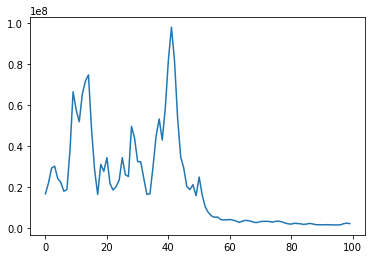

In [354]:

times = np.arange(0,100,1) 
position_vectors = np.array([np.zeros(200),np.zeros(200),np.zeros(200)])
intensity_time = np.array([])
for i in range(100):
    phases = phasemaker(position_vectors, math.pi /2)
    intense  = intensitymaker(phases)
    intensity_time = np.append(intensity_time, intense)
    timestep(position_vectors) 
useful_intensity = np.delete(intensity_time, 0)
autocorrelation(intensity_time, times)

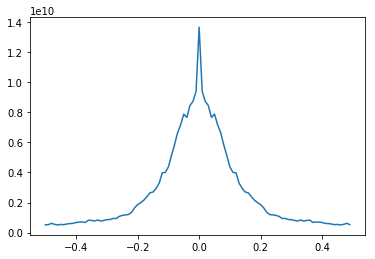

In [355]:
power, frequency = powerspectrum(intensity_time)
plt.show()


In [356]:
calculate_gamma(frequency, power)

0.076312950482 0.0166168664041


C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [333]:

position_vectors = np.array([np.zeros(100),np.zeros(100),np.zeros(100)])

intensity_time = np.array([])
time = np.array([])


 

#intensity_time[0] = 0    
#x = np.correlate(intensity_time, intensity_time)
#plt.acorr(intensity_time)
#plt.plot(time, intensity_time)
#plt.show()

In [334]:
math.sin(math.pi / 2)

1.0

In [335]:
x = np.array(([5,3,4],[2,4,5]))

y = np.dot(x,x)
print(y)

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [32]:
?np.convolve

In [ ]:
times = np.arange(0,100,1)    
position_vectors = np.array([np.zeros(100),np.zeros(100),np.zeros(100)])
intensity_time = np.array([])
for i in range(100):
    phases = phasemaker(position_vectors, math.pi /2)
    intense  = intensitymaker(phases)
    intensity_time = np.append(intensity_time, intense)
    timestep(position_vectors)  

#autocorrelation(intensity_time, times)